In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# LOAD DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/TESTP2M/DATA.csv')

In [ ]:
df.head()

,ID,Lat,Lon,Topo,Vel,Coer,cosN,cosE,cosU,TS2017-05-29,...,TS2022-04-09,TS2022-04-21,TS2022-05-03,TS2022-05-15,TS2022-05-27,TS2022-06-08,TS2022-06-20,TS2022-07-02,TS2022-07-14,TS2022-07-26
0,0,36.87375,11.13792,41.56,0.2792,0.994827,-0.102312,0.562331,0.820558,-0.0,...,1.2384,1.2163,1.2235,1.0615,0.9298,0.9675,1.1555,1.3664,1.1507,1.1523
1,1,36.87458,11.13458,48.38,0.1132,0.863957,-0.102340,0.562571,0.820390,-0.0,...,-0.0831,0.0970,0.1583,0.1478,0.3460,0.3892,0.0832,0.7153,0.5506,0.5517
2,2,36.87458,11.13375,52.36,-0.0519,0.935627,-0.102349,0.562654,0.820332,-0.0,...,-0.2104,-0.2052,-0.3818,-0.4705,-0.3154,-0.3643,-0.6702,-0.3351,-0.5337,-0.5328
3,3,36.87375,11.13375,52.34,0.1695,0.956850,-0.102349,0.562654,0.820332,-0.0,...,0.9539,1.0713,1.0821,1.0048,1.0729,1.2199,1.1347,1.5125,1.2802,1.2813
4,4,36.87375,11.13375,45.00,0.2433,0.924066,-0.102348,0.562641,0.820341,-0.0,...,2.0774,1.9942,2.0899,1.7197,1.8668,1.9244,1.6785,1.8710,1.6090,1.6102


In [ ]:
df.columns

Index(['ID', 'Lat', 'Lon', 'Topo', 'Vel', 'Coer', 'cosN', 'cosE', 'cosU',
       'TS2017-05-29',
       ...
       'TS2022-04-09', 'TS2022-04-21', 'TS2022-05-03', 'TS2022-05-15',
       'TS2022-05-27', 'TS2022-06-08', 'TS2022-06-20', 'TS2022-07-02',
       'TS2022-07-14', 'TS2022-07-26'],
      dtype='object', length=163)

In [ ]:
df.shape

(298025, 163)

In [ ]:
df.dtypes

ID                int64
Lat             float64
Lon             float64
Topo            float64
Vel             float64
                 ...   
TS2022-06-08    float64
TS2022-06-20    float64
TS2022-07-02    float64
TS2022-07-14    float64
TS2022-07-26    float64
Length: 163, dtype: object

# Study Area

In [ ]:
from IPython.display import Image

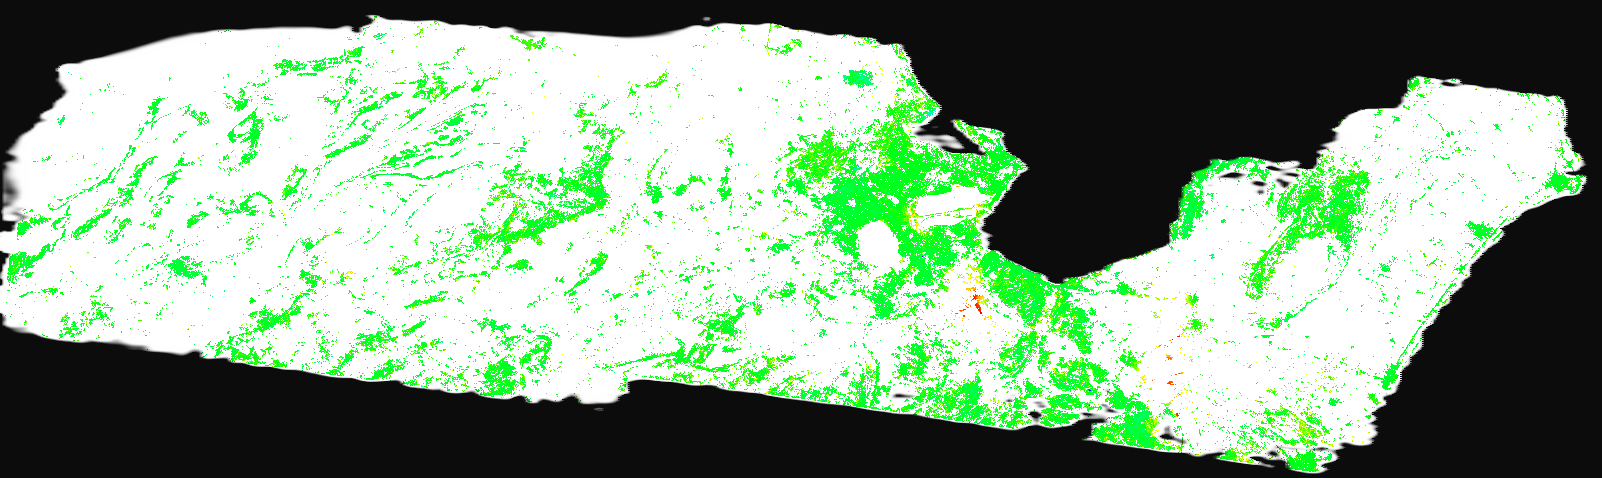

In [ ]:
Image('/content/drive/MyDrive/TESTP2M/DTSLOS.png')

In [ ]:
Image('/content/drive/MyDrive/TESTP2M/image.png')

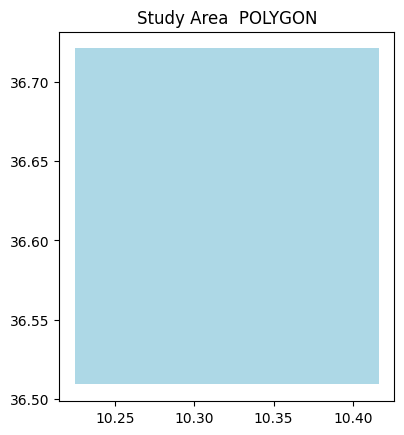

In [ ]:
import geopandas as gpd
from shapely import wkt
polygon_wkt = 'POLYGON ((10.224529266357422 36.721038818359375, 10.416545867919922 36.721038818359375, 10.416545867919922 36.50912094116211, 10.224529266357422 36.50912094116211, 10.224529266357422 36.721038818359375, 10.224529266357422 36.721038818359375))'
# Convert WKT to Shapely geometry
polygon = wkt.loads(polygon_wkt)
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(index=[0], geometry=[polygon])
# Plot the polygon
fig, ax = plt.subplots()
gdf.plot(ax=ax, color='lightblue')
plt.title('Study Area  POLYGON')
plt.show()

In [ ]:
from shapely.geometry import Polygon, Point
# Function to check if a point is in the Polygon
def isInsidePolygon(poly,point):
    return poly.contains(Point(point))

In [ ]:
# Apply the function
mask = df.apply(lambda row: isInsidePolygon(polygon,(row['Lon'], row['Lat'])), axis=1)

In [ ]:
mask

0         False
1         False
2         False
3         False
4         False
          ...  
298020    False
298021    False
298022    False
298023    False
298024    False
Length: 298025, dtype: bool

In [ ]:
mask.value_counts()

False    267226
True      30799
Name: count, dtype: int64

In [ ]:
df_region = df[mask]
df_region = df_region.reset_index()
df_region=df_region.drop(['index','ID','Topo','Vel','Coer','cosN','cosE','cosU'],axis=1)
print('new length is', df_region.shape)

new length is (30799, 156)


In [ ]:
df_region.head()

,Lat,Lon,TS2017-05-29,TS2017-06-10,TS2017-06-22,TS2017-07-04,TS2017-07-16,TS2017-07-28,TS2017-08-09,TS2017-08-21,...,TS2022-04-09,TS2022-04-21,TS2022-05-03,TS2022-05-15,TS2022-05-27,TS2022-06-08,TS2022-06-20,TS2022-07-02,TS2022-07-14,TS2022-07-26
0,36.52625,10.41625,-0.0,-0.4137,1.6059,2.0816,2.2696,2.2359,2.1391,2.0431,...,1.1163,2.1559,0.8899,2.4251,2.3054,2.2282,2.4525,2.4639,2.2536,2.2157
1,36.52542,10.41542,-0.0,-0.4580,2.2662,2.4036,3.0937,2.3632,2.5077,2.6639,...,1.6917,3.0198,1.5528,2.7528,2.8357,2.5040,2.9833,2.9528,2.6413,2.6015
2,36.52458,10.41542,-0.0,-0.4832,2.2633,2.3472,3.1625,2.4579,2.5808,2.8547,...,1.3640,2.5210,0.9611,2.1333,1.9607,1.6685,2.1462,2.1146,1.6606,1.6187
3,36.52375,10.41542,-0.0,-0.1059,2.5331,2.4662,3.6108,2.8415,2.9216,3.1357,...,2.2943,3.4037,2.2691,3.2568,3.1393,2.9918,3.2137,3.3617,2.8600,2.8160
4,36.52375,10.41625,-0.0,-0.1271,1.8970,1.8526,2.9122,2.3273,2.4179,2.4890,...,1.9393,2.8773,2.2258,2.8540,2.7093,2.8273,2.8295,3.0449,2.6126,2.5666


# EDA

In [ ]:
df_region.describe()

,Lat,Lon,TS2017-05-29,TS2017-06-10,TS2017-06-22,TS2017-07-04,TS2017-07-16,TS2017-07-28,TS2017-08-09,TS2017-08-21,...,TS2022-04-09,TS2022-04-21,TS2022-05-03,TS2022-05-15,TS2022-05-27,TS2022-06-08,TS2022-06-20,TS2022-07-02,TS2022-07-14,TS2022-07-26
count,30799.000000,30799.000000,30799.0,30799.000000,30799.000000,30799.000000,30799.000000,30799.000000,30799.000000,30799.000000,...,30799.000000,30799.000000,30799.000000,30799.000000,30799.000000,30799.000000,30799.000000,30799.000000,30799.000000,30799.000000
mean,36.613225,10.334286,0.0,-0.058523,0.244872,0.215648,0.271813,0.210762,0.256822,0.255093,...,-0.018467,0.056158,-0.078976,-0.006145,-0.027122,-0.016579,-0.037200,-0.054152,-0.105431,-0.098861
std,0.067393,0.054270,0.0,0.248846,0.768341,0.805047,1.017416,0.832457,0.946363,1.046883,...,1.641672,1.790787,1.659411,1.750574,1.763532,1.813737,1.868274,1.930395,1.891781,1.899130
min,36.509580,10.224580,-0.0,-1.821700,-1.556000,-2.351800,-2.630300,-2.521700,-2.730100,-2.943800,...,-14.396700,-14.359900,-14.547200,-14.731200,-14.863100,-14.988700,-15.397000,-15.877600,-15.874500,-15.889500
25%,36.549580,10.289580,-0.0,-0.168150,-0.245900,-0.320700,-0.427700,-0.346000,-0.377300,-0.436400,...,-0.467850,-0.547350,-0.541350,-0.538500,-0.549300,-0.557400,-0.573600,-0.589300,-0.573650,-0.573700
50%,36.607080,10.342920,0.0,-0.001400,-0.025300,0.009600,0.027600,0.085900,0.111000,0.062100,...,0.261200,0.244300,0.191800,0.253900,0.250100,0.257200,0.250200,0.244000,0.234000,0.238900
75%,36.680420,10.378750,-0.0,0.093400,0.642150,0.647750,0.817350,0.690600,0.824650,0.847050,...,0.833050,0.978150,0.787950,0.905950,0.896850,0.926250,0.933900,0.934200,0.864250,0.879700
max,36.720420,10.416250,-0.0,1.039200,4.806900,4.076300,6.171200,3.624600,3.971100,5.708400,...,5.622500,7.103600,4.778200,6.308200,5.557900,6.271700,5.336600,5.712800,5.314200,5.491600


green region

In [ ]:
#green point
G=(36.6127537,10.3427848)

In [ ]:
df_region[(df_region['Lat'] >= G[0] - 0.001) & (df_region['Lat'] <= G[0] + 0.001) & (df_region['Lon'] >= G[1] - 0.001) & (df_region['Lon'] <= G[1] + 0.001)]

,Lat,Lon,TS2017-05-29,TS2017-06-10,TS2017-06-22,TS2017-07-04,TS2017-07-16,TS2017-07-28,TS2017-08-09,TS2017-08-21,...,TS2022-04-09,TS2022-04-21,TS2022-05-03,TS2022-05-15,TS2022-05-27,TS2022-06-08,TS2022-06-20,TS2022-07-02,TS2022-07-14,TS2022-07-26
13842,36.61375,10.34375,-0.0,0.1207,1.7216,1.6138,2.3272,1.5236,1.8411,2.6716,...,1.7599,3.1839,1.0373,1.9096,2.5041,2.2719,2.6623,2.7991,2.1877,2.2087
13843,36.61375,10.34375,-0.0,-0.0318,1.5077,1.4081,1.8355,1.3137,1.6424,2.2013,...,1.4426,2.4700,0.6685,1.5858,2.0193,1.8992,2.1989,2.4563,1.9133,1.9382
13844,36.61292,10.34375,-0.0,-0.3019,0.9030,1.0273,1.1554,0.8542,1.2596,1.4411,...,1.1996,1.5630,0.6663,1.0161,1.3433,1.3174,1.2010,1.3909,0.9937,1.3137
13845,36.61208,10.34375,-0.0,-0.0986,0.7655,0.9365,0.7834,0.7513,1.1744,0.8821,...,1.7876,2.0265,1.3328,1.9364,1.7862,2.1601,1.7646,2.0269,1.7508,2.0572
14035,36.61292,10.34208,-0.0,-0.6821,1.9144,1.9406,2.6676,1.6864,2.1138,2.7428,...,1.4343,2.9240,0.4224,2.0379,2.0386,2.2834,2.4825,2.5385,2.0006,2.0831
14036,36.61208,10.34208,-0.0,-0.3003,1.7088,1.7444,2.1979,1.5674,1.9780,2.2606,...,1.2906,2.3374,0.4705,1.6973,1.6041,1.8989,1.8209,1.9480,1.5653,1.6276
14037,36.61208,10.34208,-0.0,-0.2951,1.3787,1.5468,1.7937,1.2515,1.6203,1.9638,...,1.2955,1.9489,0.6728,1.5698,1.4793,1.8317,1.8180,2.1180,1.9426,1.9319


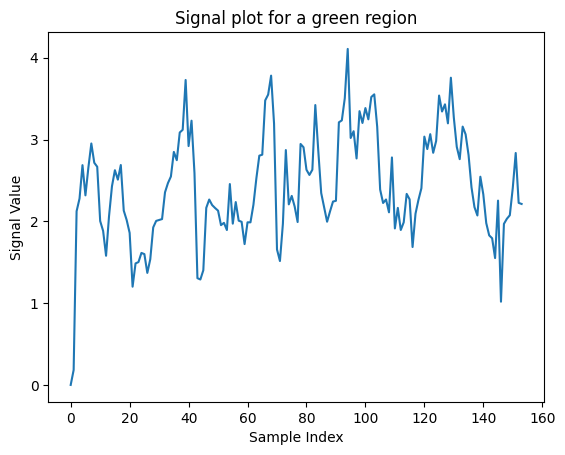

In [ ]:
Gsample = df_region.iloc[19860].values[2::]
plt.plot(Gsample)
plt.title('Signal plot for a green region')
plt.xlabel('Sample Index')
plt.ylabel('Signal Value')
plt.show()

red region

In [ ]:
#red point
R=(36.6761504, 10.2851468)

In [ ]:
df_region[(df_region['Lat'] >= R[0] - 0.001) & (df_region['Lat'] <= R[0] + 0.001) & (df_region['Lon'] >= R[1] - 0.001) & (df_region['Lon'] <= R[1] + 0.001)]

,Lat,Lon,TS2017-05-29,TS2017-06-10,TS2017-06-22,TS2017-07-04,TS2017-07-16,TS2017-07-28,TS2017-08-09,TS2017-08-21,...,TS2022-04-09,TS2022-04-21,TS2022-05-03,TS2022-05-15,TS2022-05-27,TS2022-06-08,TS2022-06-20,TS2022-07-02,TS2022-07-14,TS2022-07-26
26319,36.67625,10.28542,-0.0,0.2467,-0.3924,-0.9022,-1.0667,-1.3056,-1.6423,-1.9133,...,-11.2804,-11.3486,-11.4496,-11.6381,-11.7889,-12.0895,-12.2818,-12.6441,-12.8660,-12.8816
26320,36.67625,10.28542,-0.0,0.1499,-0.3599,-0.8460,-0.9735,-1.1958,-1.5109,-1.7727,...,-11.2725,-11.2926,-11.4980,-11.7171,-11.8269,-12.0748,-12.2384,-12.5011,-12.7209,-12.7360
26321,36.67542,10.28542,-0.0,0.1191,-0.3838,-0.8143,-1.0773,-1.2375,-1.6193,-1.8028,...,-10.8503,-11.0034,-11.0921,-11.3822,-11.4994,-11.6974,-11.7673,-12.2038,-12.5193,-12.5341
26429,36.67708,10.28542,-0.0,0.1760,-0.2571,-0.8499,-0.9843,-1.1855,-1.5862,-1.8022,...,-11.4329,-11.4843,-11.4077,-11.7958,-11.8021,-12.1062,-12.4300,-12.6942,-12.9214,-12.9387
26430,36.67625,10.28458,-0.0,0.0647,-0.2570,-1.0404,-1.1413,-1.1337,-1.4322,-1.8403,...,-11.4345,-11.3716,-11.5028,-11.8218,-11.8691,-12.1425,-12.2637,-12.4650,-12.7023,-12.7189
26431,36.67625,10.28458,-0.0,0.1974,-0.3282,-0.9708,-1.1152,-1.3176,-1.6809,-1.9266,...,-11.2429,-11.1598,-11.4323,-11.6807,-11.7841,-12.0757,-12.3575,-12.5422,-12.8197,-12.8357
26432,36.67542,10.28458,-0.0,0.0195,-0.5632,-1.0439,-1.3867,-1.4872,-1.9458,-2.0557,...,-11.2748,-11.3362,-11.5318,-11.6356,-11.8770,-12.0785,-12.2703,-12.4419,-12.8302,-12.8459
26529,36.67708,10.28458,-0.0,-0.0480,-0.4359,-1.0628,-1.0939,-1.3425,-1.5875,-1.9951,...,-11.3933,-11.4537,-11.6362,-11.7392,-12.0218,-12.1817,-12.4096,-12.7015,-12.8505,-12.8687


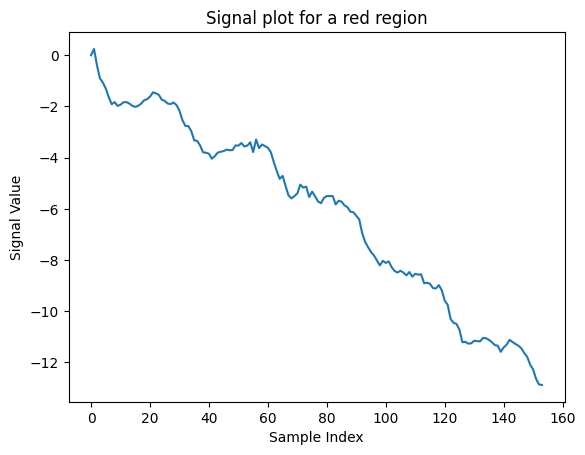

In [ ]:
Rsample = df_region.iloc[26319].values[2::]
plt.plot(Rsample)
plt.title('Signal plot for a red region')
plt.xlabel('Sample Index')
plt.ylabel('Signal Value')
plt.show()

values acquisition frequance

In [ ]:
from datetime import datetime
dates=[datetime.strptime(e.replace('TS',''), '%Y-%m-%d') for e in df_region.columns[2::].tolist()]

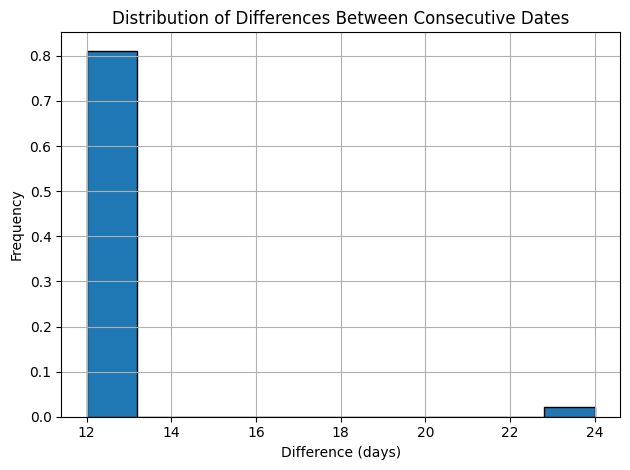

In [ ]:
differences = [(dates[i+1] - dates[i]).days for i in range(len(dates)-1)]

# Plotting the histogram
plt.hist(differences, bins=10, edgecolor='black',density=True)
plt.title('Distribution of Differences Between Consecutive Dates')
plt.xlabel('Difference (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# SENTINEL 1 DATA PREPARATION

# GROUND TRUTH

From Lat,Lon,Signal to an array Mask

In [ ]:
lon_min, lon_max = df_region['Lon'].min(), df_region['Lon'].max()
lat_min, lat_max = df_region['Lat'].min(), df_region['Lat'].max()

In [ ]:
#encode signal values in an image foramt
def createSignalMask(df, signal_column, size):
    # Initialize an empty NumPy array for the grayscale image
    image = np.zeros((size, size))
    # Map data points to image pixels and assign grayscale values
    for _, row in df.iterrows():
        x = int((row['Lon'] - lon_min) / (lon_max - lon_min) * (size - 1))
        y = int((row['Lat'] - lat_min) / (lat_max - lat_min) * (size - 1))
        grayscale_value = row[signal_column]

        if 0 <= x < size and 0 <= y < size:
            image[size-1-y, x] = grayscale_value

    return image

In [ ]:
# reverse and get signal values from image
def extractSignal(image):
    image_height, image_width =image.shape
    # Initialize lists to store extracted data
    signal_values = []
    longitudes = []
    latitudes = []
    # Loop through all pixels in the image and extract data
    for y in range(image_height):
        for x in range(image_width):
            lon = lon_min + x * (lon_max - lon_min) / (image_width - 1)
            lat = lat_min + y * (lat_max - lat_min) / (image_height - 1)
            signal_value = image[y, x]
            signal_values.append(signal_value)
            longitudes.append(lon)
            latitudes.append(lat)
    # Create a dataframe to store the extracted data
    data = {'Lon': longitudes, 'Lat': latitudes, 'Signal': signal_values}
    extracted_df = pd.DataFrame(data)
    return extracted_df

Exampels

In [ ]:
label1=createSignalMask(df_region,"TS2017-06-10",224)

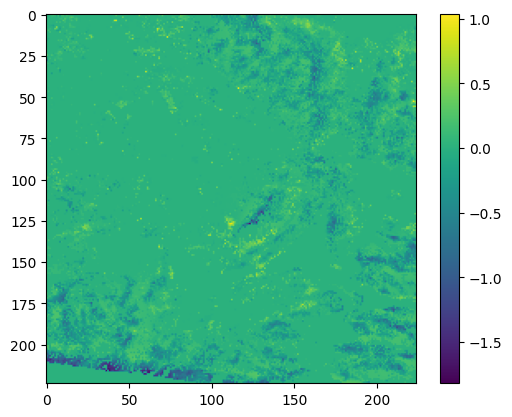

In [ ]:
plt.imshow(label1)
plt.colorbar()
plt.show()

In [ ]:
res1=extractSignal(label1)
res1.head()

,Lon,Lat,Signal
0,10.224580,36.50958,0.0065
1,10.225440,36.50958,0.3139
2,10.226299,36.50958,0.1898
3,10.227159,36.50958,0.1141
4,10.228018,36.50958,0.1238


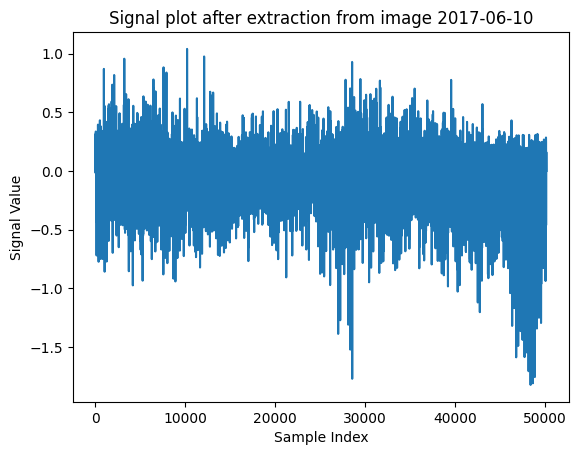

In [ ]:
plt.plot(res1["Signal"])
plt.xlabel("Sample Index")
plt.ylabel("Signal Value")
plt.title("Signal plot after extraction from image 2017-06-10")
plt.show()

In [ ]:
label2=createSignalMask(df_region,"TS2022-07-26",224)

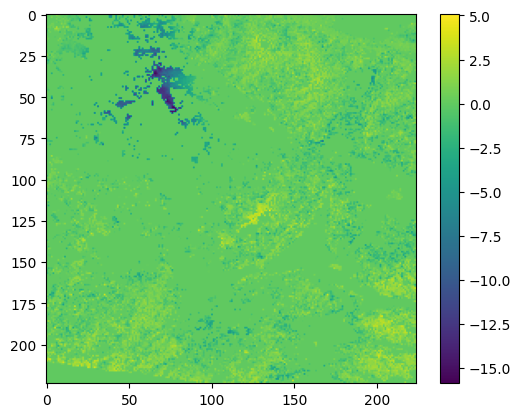

In [ ]:
plt.imshow(label2)
plt.colorbar()
plt.show()

In [ ]:
res2=extractSignal(label2)
res2.head()

,Lon,Lat,Signal
0,10.224580,36.50958,-0.7761
1,10.225440,36.50958,1.7162
2,10.226299,36.50958,0.2004
3,10.227159,36.50958,0.5326
4,10.228018,36.50958,0.2128


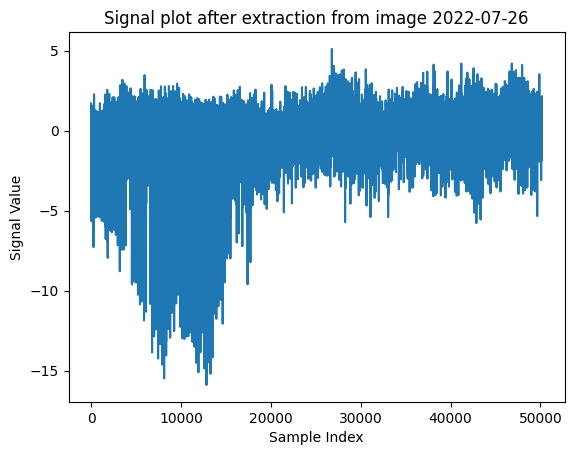

In [ ]:
plt.plot(res2["Signal"])
plt.xlabel("Sample Index")
plt.ylabel("Signal Value")
plt.title("Signal plot after extraction from image 2022-07-26")
plt.show()

Create and save all labels in array mask format (save as numpy array .npy)

In [ ]:
import os
for e in df_region.columns[2:].tolist():
    output_filename = f"/content/drive/MyDrive/TESTP2M/labels/{e}.npy"
    if not os.path.exists(output_filename):
        mask=createSignalMask(df_region, e, 224)
        np.save(output_filename, mask)
    else:
        print(f"File '{output_filename}' already exists. Skipping...")

File '/content/drive/MyDrive/TESTP2M/labels/TS2017-05-29.npy' already exists. Skipping...
File '/content/drive/MyDrive/TESTP2M/labels/TS2017-06-10.npy' already exists. Skipping...
File '/content/drive/MyDrive/TESTP2M/labels/TS2017-06-22.npy' already exists. Skipping...
File '/content/drive/MyDrive/TESTP2M/labels/TS2017-07-04.npy' already exists. Skipping...
File '/content/drive/MyDrive/TESTP2M/labels/TS2017-07-16.npy' already exists. Skipping...
File '/content/drive/MyDrive/TESTP2M/labels/TS2017-07-28.npy' already exists. Skipping...
File '/content/drive/MyDrive/TESTP2M/labels/TS2017-08-09.npy' already exists. Skipping...
File '/content/drive/MyDrive/TESTP2M/labels/TS2017-08-21.npy' already exists. Skipping...
File '/content/drive/MyDrive/TESTP2M/labels/TS2017-09-02.npy' already exists. Skipping...
File '/content/drive/MyDrive/TESTP2M/labels/TS2017-09-14.npy' already exists. Skipping...
File '/content/drive/MyDrive/TESTP2M/labels/TS2017-09-26.npy' already exists. Skipping...
File '/con

# Sentinel 1 images

In [ ]:
from osgeo import gdal

In [ ]:
def readS1Image(image_path):
    # Load the TIFF image
    ds = gdal.Open(image_path)
    # Read the  band and return a NumPy array
    band = ds.GetRasterBand(1)
    band_data = band.ReadAsArray()
    return np.array(band_data)

In [ ]:
from skimage.transform import resize
def resizeS1Image(image):
    # Resize the image to 224*224 pixels with interpolation
    resized_image = resize(image, (224, 224), anti_aliasing=True)
    return resized_image

  Note that it is not necessary to plot the image because it's not containing pixel values to be plotted as any other images , it contains signal values (sigma0_vv)

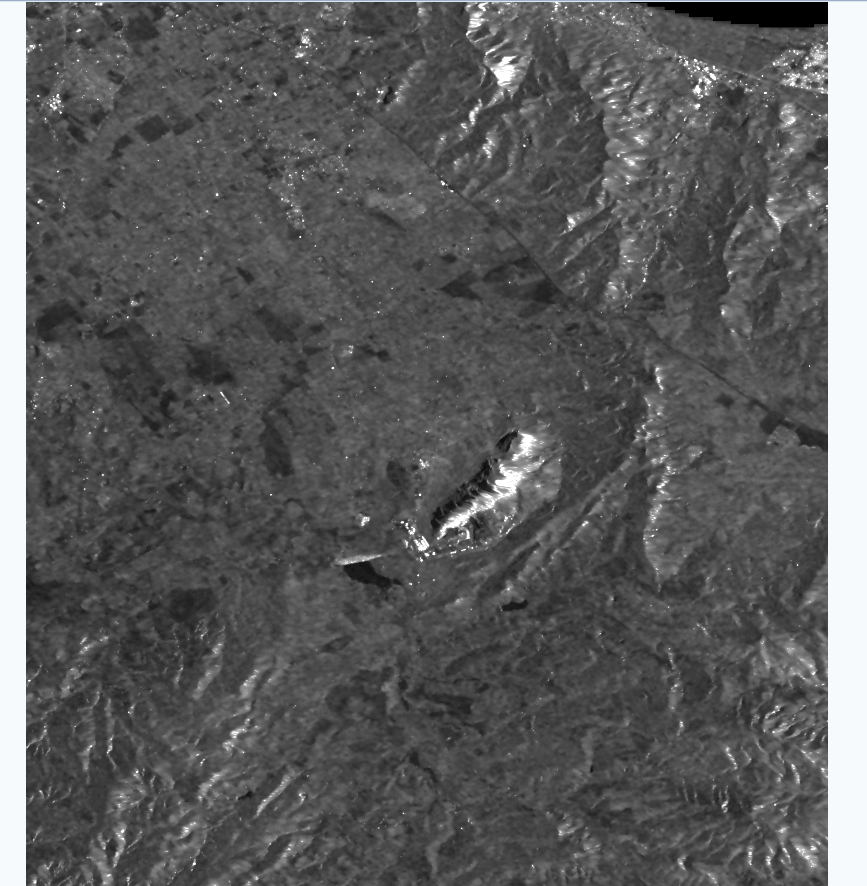

In [ ]:
Image('/content/drive/MyDrive/TESTP2M/S1IMAGE.png')

Load images and corresponding labels in a dataframe

In [ ]:
import re
def extractDateImagePath(file_path):
    #Extracts the date in the format YYYYMMDD from the given file path string.
    # Regular expression pattern to find the date
    pattern = r'_(\d{8})T'
    # Search for the pattern
    match = re.search(pattern, file_path)
    if match:
        return match.group(1)
    else:
        return ""
def extractDateLabelPath(date_str):
    pattern = r'TS(\d{4}-\d{2}-\d{2})'

    # Search for the pattern
    match = re.search(pattern, file_path)

    if match:
        date_str = match.group(1)
        # Remove hyphens from the date string
        cleaned_date = date_str.replace('-', '')
        return cleaned_date
    else:
        return ""

images_dir="/content/drive/MyDrive/TESTP2M/S1ImagesOutput"
images = {'Date': [], 'ImagePath': []}
# Iterate over all files in the directory
for root, dirs, files in os.walk(images_dir):
    for file in files:
        file_path = os.path.join(root, file)
        date = extractDateImagePath(file_path)
        if date:
            images['Date'].append(date)
            images['ImagePath'].append(file_path)

labels_dir="/content/drive/MyDrive/TESTP2M/labels"
labels = {'Date': [], 'LabelPath': []}
# Iterate over all files in the directory
for root, dirs, files in os.walk(labels_dir):
    for file in files:
        file_path = os.path.join(root, file)
        date = extractDateLabelPath(file_path)
        if date:
            labels['Date'].append(date)
            labels['LabelPath'].append(file_path)

images=pd.DataFrame(images)
labels=pd.DataFrame(labels)
all_data = pd.merge(images, labels, on='Date', how='inner')
all_data.head()

,Date,ImagePath,LabelPath
0,20170610,/content/drive/MyDrive/TESTP2M/S1ImagesOutput/...,/content/drive/MyDrive/TESTP2M/labels/TS2017-0...
1,20170622,/content/drive/MyDrive/TESTP2M/S1ImagesOutput/...,/content/drive/MyDrive/TESTP2M/labels/TS2017-0...
2,20170704,/content/drive/MyDrive/TESTP2M/S1ImagesOutput/...,/content/drive/MyDrive/TESTP2M/labels/TS2017-0...
3,20170716,/content/drive/MyDrive/TESTP2M/S1ImagesOutput/...,/content/drive/MyDrive/TESTP2M/labels/TS2017-0...
4,20170728,/content/drive/MyDrive/TESTP2M/S1ImagesOutput/...,/content/drive/MyDrive/TESTP2M/labels/TS2017-0...


In [ ]:
Images=[]
Labels=[]
for _,row in all_data.iterrows():
    Images.append(resizeS1Image(readS1Image(row['ImagePath'])))
    Labels.append(np.load(row['LabelPath']))

In [ ]:
X=[]
y=[]
window_size=5
for i in range(144-window_size):
  X.append([r for r in  Images[i:i + window_size]])
  y.append(Labels[i+window_size])

In [ ]:
X=np.array(X)
print(X.shape)
X=X.reshape((139, 5, 224, 224, 1))

(139, 5, 224, 224)


In [ ]:
y=np.array(y)
print(y.shape)
y=y.reshape((139, 224, 224, 1))

(139, 224, 224)


In [ ]:
X_train, y_train = X[:110], y[:110]
X_test, y_test = X[110:], y[110:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((110, 5, 224, 224, 1),
 (110, 224, 224, 1),
 (29, 5, 224, 224, 1),
 (29, 224, 224, 1))

# MODEL ARCHITECTURE

In [ ]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, LSTM, TimeDistributed, Flatten, Dense, Reshape, BatchNormalization
from keras.utils import plot_model

In [ ]:
def CNN_LSTM():
    # Input layer for sequences of images
    input_img = Input(shape=(None, 224, 224, 1))

    # TimeDistributed CNN Encoder
    x = TimeDistributed(Conv2D(16, (3, 3), activation='relu', padding='same'))(input_img)
    x = TimeDistributed(BatchNormalization())(x)
    x = TimeDistributed(MaxPooling2D((2, 2), padding='same'))(x)
    x = TimeDistributed(Conv2D(32, (3, 3), activation='relu', padding='same'))(x)
    x = TimeDistributed(BatchNormalization())(x)
    x = TimeDistributed(MaxPooling2D((2, 2), padding='same'))(x)
    x = TimeDistributed(Conv2D(64, (3, 3), activation='relu', padding='same'))(x)
    x = TimeDistributed(BatchNormalization())(x)
    encoded = TimeDistributed(MaxPooling2D((2, 2), padding='same'))(x)

    # LSTM to capture temporal dependencies
    x = TimeDistributed(Flatten())(encoded)
    x = LSTM(256, return_sequences=False)(x)

    # Dense layer to create a vector suitable for image reshaping
    dense_out = Dense(224*224, activation='relu')(x)
    reshaped_out = Reshape((28, 28, 64))(dense_out)

    # CNN Decoder
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(reshaped_out)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='linear', padding='same')(x)

    # Complete model
    model = Model(input_img, decoded)
    return model

In [ ]:
model = CNN_LSTM()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 224, 224,   0         
                              1)]                                
                                                                 
 time_distributed (TimeDist  (None, None, 224, 224,    160       
 ributed)                    16)                                 
                                                                 
 time_distributed_1 (TimeDi  (None, None, 224, 224,    64        
 stributed)                  16)                                 
                                                                 
 time_distributed_2 (TimeDi  (None, None, 112, 112,    0         
 stributed)                  16)                                 
                                                                 
 time_distributed_3 (TimeDi  (None, None, 112, 112,    4640  

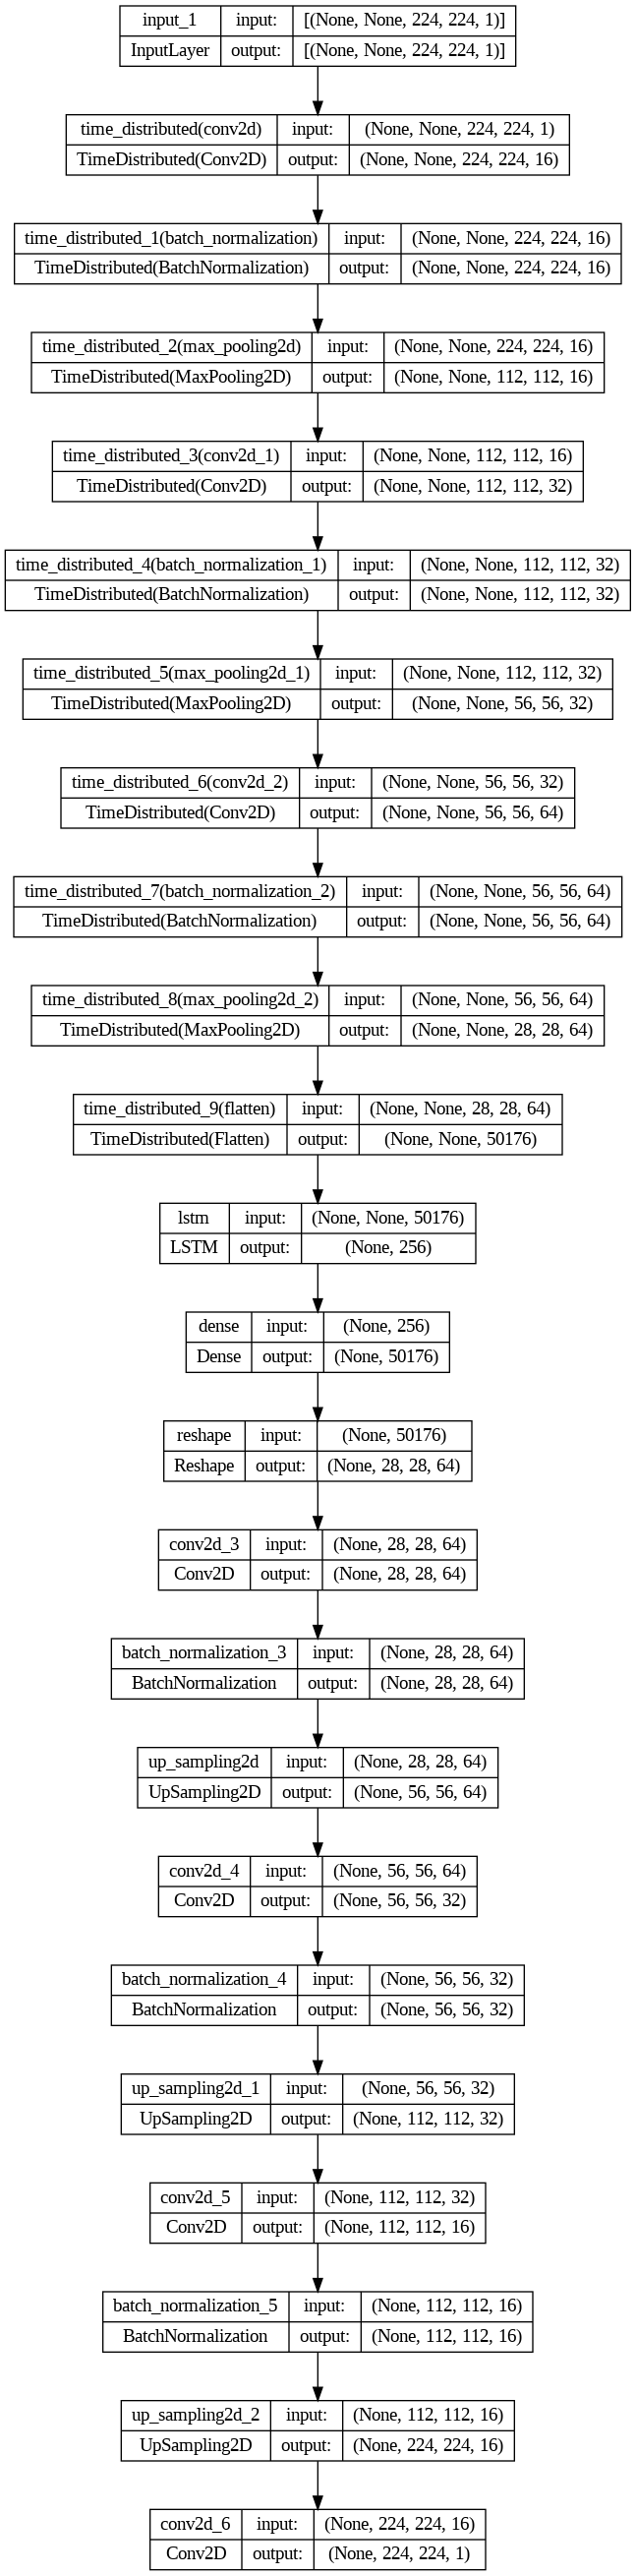

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# LOSS AND METRIC

In [ ]:
def mse_loss(y_true, y_pred):
    # Calculate mean square error for each element
    mse_per_element = tf.square(y_true - y_pred)
    # Compute the mean of the squared errors
    mse = tf.reduce_mean(mse_per_element)
    return mse

In [ ]:
def mae_metric(y_true, y_pred):
    # Calculate absolute error for each element
    absolute_error_per_element = tf.abs(y_true - y_pred)
    # Compute the mean of the absolute errors
    mae = tf.reduce_mean(absolute_error_per_element)
    return mae

# Compile the model

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(), loss=mse_loss, metrics=[mae_metric])

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=16)

Epoch 1/100
7/7 [==============================] - 1s 158ms/step - loss: 0.2036 - mae_metric: 0.2758 - val_loss: 1.0079 - val_mae_metric: 0.4765
Epoch 2/100
7/7 [==============================] - 1s 151ms/step - loss: 0.2028 - mae_metric: 0.2787 - val_loss: 1.0065 - val_mae_metric: 0.4783
Epoch 3/100
7/7 [==============================] - 1s 158ms/step - loss: 0.2009 - mae_metric: 0.2776 - val_loss: 0.9786 - val_mae_metric: 0.4727
Epoch 4/100
7/7 [==============================] - 1s 156ms/step - loss: 0.2019 - mae_metric: 0.2745 - val_loss: 0.9309 - val_mae_metric: 0.4696
Epoch 5/100
7/7 [==============================] - 1s 151ms/step - loss: 0.2009 - mae_metric: 0.2711 - val_loss: 0.9311 - val_mae_metric: 0.4684
Epoch 6/100
7/7 [==============================] - 1s 161ms/step - loss: 0.1959 - mae_metric: 0.2677 - val_loss: 0.9186 - val_mae_metric: 0.4725
Epoch 7/100
7/7 [==============================] - 1s 161ms/step - loss: 0.1941 - mae_metric: 0.2703 - val_loss: 0.8990 - val_mae_

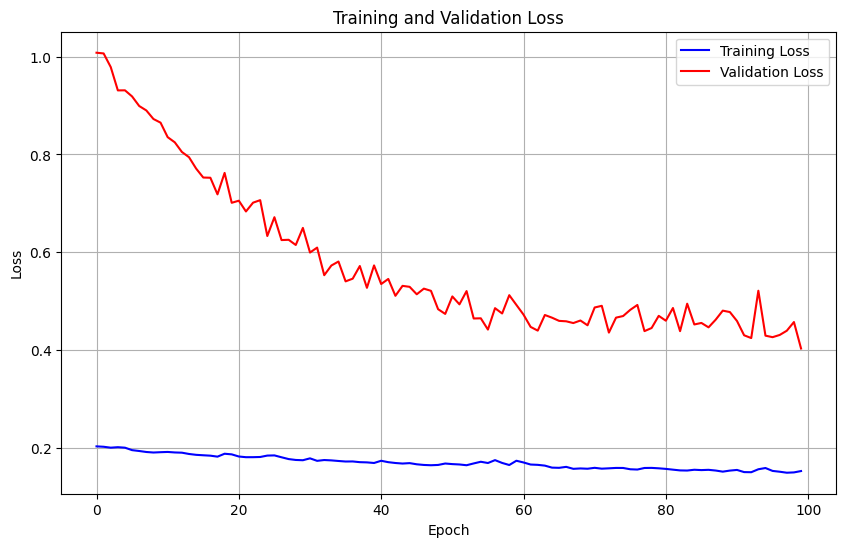

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_pred=model.predict(X_test)

1/1 [==============================] - 0s 74ms/step


In [ ]:
y_pred.shape

(29, 224, 224, 1)

In [ ]:
mae_metric(y_pred,y_test).numpy()

0.3849954883002565

In [ ]:
final=y_pred[28]

In [ ]:
final.shape

(224, 224, 1)

In [ ]:
final=final.reshape(224,224)

In [ ]:
finalres=extractSignal(final)
finalres.head()

,Lon,Lat,Signal
0,10.224580,36.50958,-0.228604
1,10.225440,36.50958,0.069079
2,10.226299,36.50958,-0.271234
3,10.227159,36.50958,-0.194394
4,10.228018,36.50958,-0.075785


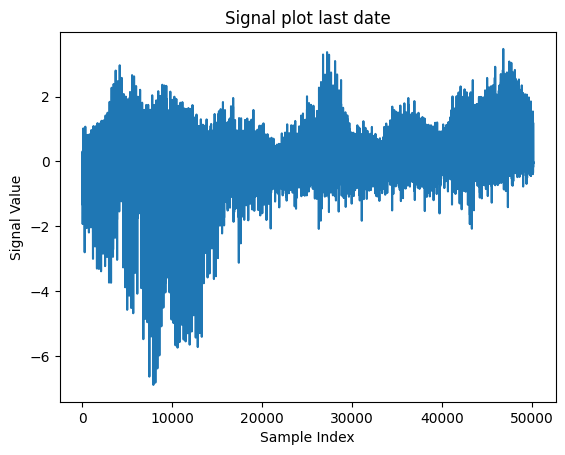

In [ ]:
plt.plot(finalres["Signal"])
plt.xlabel("Sample Index")
plt.ylabel("Signal Value")
plt.title("Signal plot last date")
plt.show()